# Section 1 - Data Collection

In [1]:
#Importing libraries we are going to use throughout the code
import numpy as np
import pandas as pd
import selenium #For scraping the data
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
#Company Name
comp_name = 'tata consultancy services'

### Historical Closing Prices Scraping - Yahoo Finance

In [98]:
#Calling Chrome Web driver (Opening a new Chrome Window)
driver = webdriver.Chrome(r'C:\Users\nmittal\Downloads\chromedriver.exe')

#Specifying URL
url = "https://in.finance.yahoo.com/" 

driver.get(url)

#Maximizing Window
driver.maximize_window()

In [103]:
#Web driver is picking up the combination of  particular Tag-attribute-value
inputElement = driver.find_element_by_css_selector('input[id="yfin-usr-qry"]')
inputElement.send_keys(comp_name)

#Pressing Enter
inputElement.send_keys(Keys.ENTER)

time.sleep(5)

driver.find_element_by_css_selector('li[data-test="HISTORICAL_DATA"]').click()

driver.find_element_by_css_selector('span[class="C($linkColor) Fz(14px)"]').click()

driver.find_element_by_css_selector('button[data-value="5_Y"]').click()

driver.find_element_by_css_selector('button[class=" Bgc($linkColor) Bdrs(3px) Px(20px) Miw(100px) Whs(nw) Fz(s) Fw(500) C(white) Bgc($linkActiveColor):h Bd(0) D(ib) Cur(p) Td(n)  Py(9px) Fl(end)"]').click()

#Scrolling down 100 times
for i in range(1,100):
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    
    
m = driver.find_elements_by_css_selector('tr[class = "BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)"]')

list1 = []

for i in m:
    a = i.text.split()
    list1.append(a)

In [110]:
list1

[['31-May-2021',
  '3,150.00',
  '3,170.35',
  '3,128.60',
  '3,159.15',
  '3,159.15',
  '16,51,930'],
 ['28-May-2021',
  '3,189.50',
  '3,198.00',
  '3,135.65',
  '3,143.60',
  '3,143.60',
  '17,63,701'],
 ['27-May-2021',
  '3,161.95',
  '3,217.75',
  '3,161.80',
  '3,180.00',
  '3,180.00',
  '59,59,785'],
 ['26-May-2021',
  '3,120.00',
  '3,165.00',
  '3,103.80',
  '3,158.50',
  '3,158.50',
  '19,23,753'],
 ['25-May-2021',
  '3,092.00',
  '3,128.25',
  '3,082.10',
  '3,114.00',
  '3,114.00',
  '18,41,613'],
 ['25-May-2021', '15', 'Dividend'],
 ['24-May-2021',
  '3,081.50',
  '3,105.00',
  '3,072.00',
  '3,081.50',
  '3,066.50',
  '16,52,260'],
 ['21-May-2021',
  '3,061.00',
  '3,088.20',
  '3,055.10',
  '3,080.50',
  '3,065.50',
  '16,85,566'],
 ['20-May-2021',
  '3,067.10',
  '3,088.80',
  '3,052.10',
  '3,060.00',
  '3,045.10',
  '23,29,027'],
 ['19-May-2021',
  '3,084.00',
  '3,118.00',
  '3,067.10',
  '3,082.00',
  '3,067.00',
  '19,86,041'],
 ['18-May-2021',
  '3,100.00',
  '3,1

In [111]:
dates = []
open_prices = []
high_prices = []
low_prices = []
close_prices = []
volume = []

for i in list1:
    if len(i) == 7:
        date = i[0]
        open_p = i[1]
        high_p = i[2]
        low_p = i[3]
        close_p = i[4]
        volume_a = i[6]
        dates.append(date)
        open_prices.append(open_p)
        high_prices.append(high_p)
        low_prices.append(low_p)
        close_prices.append(close_p)
        volume.append(volume_a)
        
        
dict_a = {'Date': dates, 'open_price': open_prices, 'high_price': high_prices, 'low_price': low_prices, 'close_price':close_prices, 'volume':volume} 
  
# Create the pandas DataFrame 
historical_closing_prices = pd.DataFrame(dict_a)

for i in range(len(historical_closing_prices['Date'])):
    x = historical_closing_prices['Date'][i].replace(',', ' ')
    historical_closing_prices['Date'][i] = x

historical_closing_prices['Date'] = pd.to_datetime(historical_closing_prices['Date']).dt.date    

historical_closing_prices

Date open_price high_price low_price close_price     volume
0    2021-05-31   3,150.00   3,170.35  3,128.60    3,159.15  16,51,930
1    2021-05-28   3,189.50   3,198.00  3,135.65    3,143.60  17,63,701
2    2021-05-27   3,161.95   3,217.75  3,161.80    3,180.00  59,59,785
3    2021-05-26   3,120.00   3,165.00  3,103.80    3,158.50  19,23,753
4    2021-05-25   3,092.00   3,128.25  3,082.10    3,114.00  18,41,613
..          ...        ...        ...       ...         ...        ...
486  2019-06-12   2,245.00   2,266.90  2,219.00    2,260.90  24,04,448
487  2019-06-11   2,237.00   2,263.95  2,231.00    2,252.80  30,48,937
488  2019-06-10   2,196.70   2,235.85  2,185.50    2,231.50  20,80,593
489  2019-06-07   2,174.00   2,189.80  2,142.10    2,181.75  26,59,446
490  2019-06-06   2,199.00   2,199.00  2,152.00    2,166.10  37,35,467

[491 rows x 6 columns]

In [112]:
historical_closing_prices.to_csv("historical_closing_prices.csv")

### News Scraping - Livemint

In [218]:
driver = webdriver.Chrome(r'C:\Users\nmittal\Downloads\chromedriver.exe')
#Specifying URL
url = "https://www.livemint.com/" 
driver.get(url)
driver.maximize_window()

In [221]:
driver.find_element_by_css_selector('a[class="icoSearch iconSprite"]').click()

inputElement = driver.find_element_by_css_selector('input[name="searchParameter"]')
inputElement.send_keys(comp_name)
inputElement.send_keys(Keys.ENTER)

for i in range(1,20):
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    
m = driver.find_elements_by_css_selector('div[class="headlineSec"]')

list1 = []

for i in m:
    a = i.text.split('\n')
    list1.append(a)
    
df_news_livemint = pd.DataFrame(list1, columns =['news_lm', 'Date'])

In [222]:
df_news_livemint['Date1'] = ''

for i in range(len(df_news_livemint['Date'])):
    try:
        x = df_news_livemint['Date'][i].split('Updated: ')[-1]
        df_news_livemint['Date1'][i] = x
    except:
        pass
    

df_news_livemint['Date'] = pd.to_datetime(df_news_livemint['Date1']).dt.date    

df_news_livemint = df_news_livemint[['Date', 'news_lm']]

news_count = df_news_livemint.groupby(df_news_livemint['Date']).agg(['count']).reset_index()
df_news_livemint1 = df_news_livemint.groupby(df_news_livemint['Date'])['news_lm'].apply(','.join).reset_index() 
df_news_livemint = pd.merge(df_news_livemint1, news_count, on='Date')

df_news_livemint.sort_values(by='Date', ascending=False)

Date                                            news_lm  \
160  2021-05-27        TCS acquires GE's stake in TCS Saudi Arabia   
159  2021-05-21  TCS setting up over 100 COVID vaccination cent...   
158  2021-05-19  TCS CEO Rajesh Gopinathan draws ₹20.36 crore p...   
157  2021-05-02  M-cap of seven of top-10 most-valued companies...   
156  2021-04-30  TCS appoints Samir Seksaria as CFO effective 1...   
..          ...                                                ...   
4    2018-01-12  Opening bell: Asian markets open mixed; Infosy...   
3    2018-01-09  Marks & Spencer seeks technology savings throu...   
2    2017-12-01  We believe in building technologies and talent...   
1    2017-11-17  TCS to build its own technology, develop in-ho...   
0    2017-09-26  Lloyds Bank to transfer 1,000 staff to TCS sub...   

     (news_lm, count)  
160                 1  
159                 1  
158                 1  
157                 1  
156                 1  
..                ...  
4                   1  
3                   1  
2                   1  
1                   1  
0                   1  

[161 rows x 3 columns]

In [223]:
df_news_livemint.to_csv("df_news_livemint.csv")

### News Scraping - Business Standard

In [67]:
driver = webdriver.Chrome(r'C:\Users\nmittal\Downloads\chromedriver.exe')
#Specifying URL
url = "https://www.business-standard.com//" 
driver.get(url)
driver.maximize_window()

In [ ]:
inputElement = driver.find_element_by_css_selector('input[type="text"]')
inputElement.send_keys(comp_name)
inputElement.send_keys(Keys.ENTER)

m = driver.find_elements_by_css_selector('ul[class="listing"]')
driver.find_element_by_css_selector('div[class="next-colum"]').click()

list1 = []

for j in range(1,100):
    m = driver.find_elements_by_css_selector('ul[class="listing"]')
    for i in m:
        a = i.text.split('\n')
        list1.append(a)
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    driver.find_element_by_xpath("//a/span[contains(text(), 'Next')]").click()
    time.sleep(2)

In [70]:
bs_news_list = []
bs_dates_list = []

for i in range(1,len(list1)):
    np_array = np.array(list1[i])
    #Reshaping the array to make one element for every news with one as news headline and other as date
    reshaped_array = np_array.reshape(19,2)
    for i in range(len(reshaped_array)):     
        bs_news_list.append(reshaped_array[i][0])
        bs_dates_list.append(reshaped_array[i][1])

In [235]:
df_news_bs = pd.DataFrame(bs_news_list, columns =['News_bs'])
df_news_bs['Date'] = pd.DataFrame(bs_dates_list)

In [237]:
df_news_bs['Date1'] = ''
for i in range(len(df_news_bs['Date'])):
    try:
        x = df_news_bs['Date'][i].split('| ')[-1]
        df_news_bs['Date1'][i] = x
    except:
        pass
    
df_news_bs['Date'] = pd.to_datetime(df_news_bs['Date1']).dt.date
df_news_bs = df_news_bs[['Date', 'News_bs']]

news_count = df_news_bs.groupby(df_news_bs['Date']).agg(['count']).reset_index()
df_news_bs1 = df_news_bs.groupby(df_news_bs['Date'])['News_bs'].apply(','.join).reset_index() 
df_news_bs = pd.merge(df_news_bs1, news_count, on='Date')

df_news_bs.sort_values(by='Date', ascending=False)

Date                                            News_bs  \
1383  2021-05-28  S D Shibulal Again Buys Infosys Shares Worth R...   
1382  2021-05-27  General Motors' Newest Vehicle: Off-Road, Self...   
1381  2021-05-25  Dysfunctional Ventilators Serious Matter: Bomb...   
1380  2021-05-24  Sea Change: Global Freight Industry Sails Out ...   
1379  2021-05-23  Birlas Betting Big On Realty, Lines Up Rs 1,00...   
...          ...                                                ...   
4     2003-08-05                           TCS Slashes Variable Pay   
3     2003-07-29              Indian Hotels, SIA Plan Joint Venture   
2     2003-07-16                           Is Listing Good For TCS?   
1     2003-07-14              CMC Keen To Avoid Duplication Of Work   
0     2003-07-10  19 Firms Invested In UK In 2002-03,19 Firms In...   

      (News_bs, count)  
1383                 1  
1382                 1  
1381                 6  
1380                 1  
1379                 1  
...                ...  
4                    1  
3                    1  
2                    1  
1                    1  
0                    2  

[1384 rows x 3 columns]

In [238]:
df_news_bs.to_csv("df_news_bs.csv")

### News Scraping - Moneycontrol.com

In [3]:
#Calling Chrome Web driver (Opening a new Chrome Window)
driver = webdriver.Chrome(r'C:\Users\nmittal\Downloads\chromedriver.exe')
#Specifying Money Control website URL
url = "https://www.moneycontrol.com/" 
#Searching for the URL
driver.get(url)
#Maximizing window
driver.maximize_window()

In [4]:
#Entering the company's name in search tab 
inputElement = driver.find_element_by_css_selector('input[class="txtsrchbox FL"]')
inputElement.send_keys(comp_name)

time.sleep(2)

#Clicking on the first option we get after entering company's name
driver.find_element_by_xpath("//ul[@class = 'suglist scrollBar']/li/a").click()

time.sleep(5)

#Getting the URL for all News as this will open in a new tab. We can't click directly on this
url1 = driver.find_element_by_xpath("//div[@id = 'news']//a[@title = 'See More']").get_attribute('href')
#Going to all news page
driver.get(url1)

In [5]:
mc_news_list = []
mc_dates_list = []

for x in range(2021,2019,-1):
    #Clicking on the year to get that year's news
    time.sleep(5)
    driver.find_element_by_xpath("//div[@class='FR yrs']//a[contains(text(), '{}')]".format(x)).click()    
    print(x)
    time.sleep(2)

    m = driver.find_elements_by_css_selector('a[class="g_14bl"]')
    n = driver.find_elements_by_css_selector('p[class="PT3 a_10dgry"]')
        
    for j in m:
        a = j.text.split('\n')
        mc_news_list.append(a)

    for k in n:
        a = k.text.split('\n')
        mc_dates_list.append(a)
        

    for i in range(2,50):
        #Clicking on next page number and getting data from there and appending in mc_news_list & mc_dates_list
        try:
            driver.find_element_by_xpath("//div[@class = 'pages MR10 MT15']//a[contains(text(), '{}')]".format(i)).click()
            time.sleep(2) 
        
            m = driver.find_elements_by_css_selector('a[class="g_14bl"]')
            n = driver.find_elements_by_css_selector('p[class="PT3 a_10dgry"]')
        
            for j in m:
                a = j.text.split('\n')
                mc_news_list.append(a)

            for k in n:
                a = k.text.split('\n')
                mc_dates_list.append(a)
                print(a)
        
        except:
            pass

2021
['12.07 pm | 26 Mar 2021 |  Source: Moneycontrol.com']
['10.00 am | 12 Jan 2021 |  Source: Moneycontrol.com']
['10.00 am | 12 Jan 2021 |  Source: Moneycontrol.com']
['5.52 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['5.48 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['5.43 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['5.27 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['5.16 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['2.07 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['1.13 pm | 11 Jan 2021 |  Source: Moneycontrol.com']
['9.04 am | 09 Jan 2021 |  Source: Moneycontrol.com']
['8.53 am | 09 Jan 2021 |  Source: Moneycontrol.com']
['6.13 pm | 08 Jan 2021 |  Source: Moneycontrol.com']
['7.28 am | 08 Jan 2021 |  Source: Moneycontrol.com']
['9.15 am | 05 Jan 2021 |  Source: Moneycontrol.com']
2020
['10.31 am | 15 Jul 2020 |  Source: Moneycontrol.com']
['10.31 am | 15 Jul 2020 |  Source: Moneycontrol.com']
['11.45 am | 10 Jul 2020 |  Source: Moneycontrol.com']
['9.05 am | 

In [32]:
df_news_mc = pd.DataFrame({'news_mc' : mc_news_list,
                             'date' : mc_dates_list}, 
                                columns=['news_mc','date'])

df_news_mc.head(5)

news_mc  \
0  [TCS sees pandemic-driven boost in Europe as c...   
1  [Accumulate Tata Consultancy Services; target ...   
2  [M-cap of eight most valued companies plummets...   
3  [Robust regulatory framework needed to deal wi...   
4  [TCS Consolidated March 2021 Net Sales at Rs 4...   

                                                date  
0         [1.47 pm | 26 May 2021 |  Source: Reuters]  
1  [2.25 pm | 25 May 2021 |  Source: Moneycontrol...  
2             [1.03 pm | 16 May 2021 |  Source: PTI]  
3             [5.18 pm | 09 May 2021 |  Source: PTI]  
4  [8.43 am | 07 May 2021 |  Source: Moneycontrol...

In [33]:
df_news_mc['date1'] = ''
for i in range(len(df_news_mc['date'])):
    try:
        for j in df_news_mc['date'][i]:
            x = j.split('| ')[1]
        df_news_mc['date1'][i] = x
    except:
        pass
    
df_news_mc['news_mc1'] = ''
for i in range(len(df_news_mc['news_mc1'])):
    x = df_news_mc['news_mc'][i][0]
    df_news_mc['news_mc1'][i] = x
    
    
df_news_mc['Date'] = pd.to_datetime(df_news_mc['date1']).dt.date
df_news_mc = df_news_mc[['Date', 'news_mc1']]


news_count = df_news_mc.groupby(df_news_mc['Date']).agg(['count']).reset_index()
df_news_mc1 = df_news_mc.groupby(df_news_mc['Date'])['news_mc1'].apply(','.join).reset_index() 
df_news_mc = pd.merge(df_news_mc1, news_count, on='Date')

df_news_mc.sort_values(by='Date', ascending=False)

C:\Users\nmittal\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\nmittal\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Date                                           news_mc1  \
67  2021-05-26  TCS sees pandemic-driven boost in Europe as cl...   
66  2021-05-25  Accumulate Tata Consultancy Services; target o...   
65  2021-05-16  M-cap of eight most valued companies plummets ...   
64  2021-05-09  Robust regulatory framework needed to deal wit...   
63  2021-05-07  TCS Consolidated March 2021 Net Sales at Rs 43...   
..         ...                                                ...   
4   2020-01-21  Hold Tata Consultancy Services; target of Rs 2...   
3   2020-01-20  TCS Q3 revenue below expectations; what should...   
2   2020-01-17  TCS Q3 profit grows 0.9%, dollar revenue growt...   
1   2020-01-04  Now, TCS moves Supreme Court against NCLAT Ord...   
0   2020-01-02  Tata-Mistry case | NCLAT adjourns RoC plea til...   

    (news_mc1, count)  
67                  1  
66                  1  
65                  1  
64                  1  
63                  1  
..                ...  
4                   3  
3                   3  
2                   2  
1                   1  
0                   1  

[68 rows x 3 columns]

In [35]:
df_news_mc.to_csv("df_news_mc.csv")

### Corporate Actions Scraping - Moneycontrol.com

In [114]:
#Calling Chrome Web driver (Opening a new Chrome Window)
driver = webdriver.Chrome(r'C:\Users\nmittal\Downloads\chromedriver.exe')
#Specifying BSE website URL
url = "https://www.bseindia.com/corporates/corporate_act.aspx" 
#Searching for the URL
driver.get(url)
#Maximizing window
driver.maximize_window()

In [115]:
#Entering the company's name in search tab and pressing enter
inputElement = driver.find_element_by_css_selector('input[class="textbox2"]')
inputElement.send_keys(comp_name)
inputElement.send_keys(Keys.ENTER)

m = driver.find_elements_by_css_selector('th[scope="col"]')
corp_headers = []

for i in m:
    a = i.text.split('\n')
    corp_headers.append(a)

corp_headers

[['Security Code'],
 ['Security Name'],
 ['Ex Date'],
 ['Purpose'],
 ['Record Date'],
 ['BC Start Date'],
 ['BC End Date'],
 ['ND Start Date'],
 ['ND End Date'],
 ['Actual Payment Date']]

In [116]:
#Getting all the corporate actions from the current page (1st page)
m = driver.find_elements_by_xpath("//tr[@class = 'TTRow']/td")

corp_actions_list = []

for i in m:
    a = i.text.split('\n')
    corp_actions_list.append(a)
    
    
#Clicking on 2 page number and getting data from there and appending in corp_actions_list
driver.find_element_by_xpath("//tr/td/a[contains(text(), '2')]").click()

m = driver.find_elements_by_xpath("//tr[@class = 'TTRow']/td")
for i in m:
    a = i.text.split('\n')
    corp_actions_list.append(a)
   
    
#Clicking on 3 page number and getting data from there and appending in corp_actions_list
driver.find_element_by_xpath("//tr/td/a[contains(text(), '3')]").click()

m = driver.find_elements_by_xpath("//tr[@class = 'TTRow']/td")
for i in m:
    a = i.text.split('\n')
    corp_actions_list.append(a)

corp_actions_list

[['532540'],
 ['TCS'],
 ['27 Jul 2007'],
 ['Interim Dividend - Rs. - 3.0000'],
 ['30 Jul 2007'],
 [' '],
 [' '],
 ['23 Jul 2007'],
 ['27 Jul 2007'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['22 Oct 2007'],
 ['Interim Dividend - Rs. - 3.0000'],
 ['23 Oct 2007'],
 [' '],
 [' '],
 ['16 Oct 2007'],
 ['22 Oct 2007'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['23 Jan 2008'],
 ['Interim Dividend - Rs. - 3.0000'],
 ['24 Jan 2008'],
 [' '],
 [' '],
 ['17 Jan 2008'],
 ['23 Jan 2008'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['18 Jun 2008'],
 ['Final Dividend - Rs. - 5.0000'],
 ['-'],
 ['20 Jun 2008'],
 ['01 Jul 2008'],
 ['13 Jun 2008'],
 ['19 Jun 2008'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['31 Jul 2008'],
 ['Interim Dividend - Rs. - 3.0000'],
 ['01 Aug 2008'],
 [' '],
 [' '],
 ['25 Jul 2008'],
 ['31 Jul 2008'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['29 Oct 2008'],
 ['Interim Dividend - Rs. - 3.0000'],
 ['31 Oct 2008'],
 [' '],
 [' '],
 ['23 Oct 2008'],
 ['29 Oct 2008'],
 ['-'],
 ['532540'],
 ['TCS'],
 ['28 Jan 2009'],
 ['Interi

In [118]:
sec_code = []
sec_name = []
ex_date = []
purpose = []
record_date = []
bc_start_date = []
bc_end_date = []
nd_start_date = []
nd_end_date = []
actual_payment_date = []

np_array = np.array(corp_actions_list)
#Reshaping the array to make one element for every corporate action row
reshaped_array = np_array.reshape((int(len(corp_actions_list)/10)),10)

for i in range(len(reshaped_array)): 
        sec_code.append(reshaped_array[i][0])
        sec_name.append(reshaped_array[i][1])
        ex_date.append(reshaped_array[i][2])
        purpose.append(reshaped_array[i][3])
        record_date.append(reshaped_array[i][4])
        bc_start_date.append(reshaped_array[i][5])        
        bc_end_date.append(reshaped_array[i][6])
        nd_start_date.append(reshaped_array[i][7])        
        nd_end_date.append(reshaped_array[i][8])
        actual_payment_date.append(reshaped_array[i][9])        

In [120]:
corp_actions = pd.DataFrame({'Security Code' : sec_code,
                             'Security Name' : sec_name,
                             'Ex Date' : ex_date,
                             'Purpose' : purpose,
                             'Record Date' : record_date,
                             'BC Start Date' : bc_start_date,
                             'BC End Date' : bc_end_date,
                             'ND Start Date' : nd_start_date,
                                'ND End Date' : nd_end_date,
                                'Actual Payment Date' : actual_payment_date}, 
                                columns=['Security Code','Security Name', 'Ex Date', 'Purpose', 
                                         'Record Date', 'BC Start Date', 'BC End Date', 'ND Start Date', 
                                         'ND End Date', 'Actual Payment Date'])

In [121]:
corp_actions

Security Code Security Name      Ex Date                           Purpose  \
0         532540           TCS  27 Jul 2007   Interim Dividend - Rs. - 3.0000   
1         532540           TCS  22 Oct 2007   Interim Dividend - Rs. - 3.0000   
2         532540           TCS  23 Jan 2008   Interim Dividend - Rs. - 3.0000   
3         532540           TCS  18 Jun 2008     Final Dividend - Rs. - 5.0000   
4         532540           TCS  31 Jul 2008   Interim Dividend - Rs. - 3.0000   
..           ...           ...          ...                               ...   
61        532540           TCS  16 Jul 2020   Interim Dividend - Rs. - 5.0000   
62        532540           TCS  14 Oct 2020  Interim Dividend - Rs. - 12.0000   
63        532540           TCS  26 Nov 2020                Buy Back of Shares   
64        532540           TCS  14 Jan 2021   Interim Dividend - Rs. - 6.0000   
65        532540           TCS  25 May 2021    Final Dividend - Rs. - 15.0000   

    Record Date BC Start Date  BC End Date ND Start Date  ND End Date  \
0   30 Jul 2007                              23 Jul 2007  27 Jul 2007   
1   23 Oct 2007                              16 Oct 2007  22 Oct 2007   
2   24 Jan 2008                              17 Jan 2008  23 Jan 2008   
3             -   20 Jun 2008  01 Jul 2008   13 Jun 2008  19 Jun 2008   
4   01 Aug 2008                              25 Jul 2008  31 Jul 2008   
..          ...           ...          ...           ...          ...   
61  17 Jul 2020                              10 Jul 2020  16 Jul 2020   
62  15 Oct 2020                              08 Oct 2020  14 Oct 2020   
63  28 Nov 2020                              23 Nov 2020  26 Nov 2020   
64  16 Jan 2021                              11 Jan 2021  14 Jan 2021   
65  27 May 2021                              20 May 2021  26 May 2021   

   Actual Payment Date  
0                    -  
1                    -  
2                    -  
3                    -  
4                    -  
..                 ...  
61                   -  
62                   -  
63                   -  
64                   -  
65                   -  

[66 rows x 10 columns]

### Tweets Scraping

In [137]:
import tweepy
import json

In [138]:
# Credentials retrived using Twitter Developer Account. Steps to retrive can be found here - 
# https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api


if __name__ == '__main__':
    
    consumer_key = "hdI4G2gHiKz2NQrlw2OiGh7pn"
    consumer_secret = "AQYS4ggXnk4wqtYq816zpdYRLWJcTIrik3jp7QEhtWtiS2turf"
    access_key = "1109774199504150531-P1xO7zV4T3GGEkoVvHJu91XXvo6xUE"
    access_secret = "gOqLubPFgEtpWgAelMJCAcXZ9F9N1kF6XdxKjmbdfYzjG"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)  

In [139]:
date_since = '2020-01-01'
numtweet = 1000

company_name = 'TCS' #user input

search_terms = [company_name+' share', company_name+' investment', company_name+' equity', company_name+' stock', company_name]
for w in search_terms:
    tweets = tweepy.Cursor(api.search, q=w, lang="en",
                           since=date_since, tweet_mode='extended', show_user = True).items(numtweet)

In [140]:
# Extracting only necessary part from the json dump

ls_id = []
ls_text = []
ls_dated = []

for t in tweets:
    ids = t._json['id']
    ls_id.append(ids)
    text = t._json['full_text']
    ls_text.append(text)
    dates = t._json['created_at']
    ls_dated.append(dates)
    
lst_dict = {"created_at": ls_dated, "id": ls_id, "full_text": ls_text}  
df  = pd.DataFrame(lst_dict)
df['created_at'] = pd.to_datetime(df['created_at']).dt.date    

In [141]:
df.head(3)

created_at                   id  \
0  2021-05-29  1398585824912936960   
1  2021-05-29  1398585743153324041   
2  2021-05-29  1398585332182884353   

                                           full_text  
0  RT @itzyunashi: wtb / lfs\n\nWonyoung and yuji...  
1  RT @itzyunashi: wtb / lfs\n\nWonyoung and yuji...  
2  Like FAANG, In INDIA we have "TWITCH"\n* TCS \...

In [142]:
#Consolidating all tweets in a single cell and grouping by date
inputdf = df.groupby([pd.to_datetime(df['created_at']).dt.date])['full_text'].apply(','.join).reset_index()  

# This dataframe will be the input parameter for our sentiment analysis function

In [296]:
df_tweets = inputdf.rename(columns={"created_at": "Date", "full_text": "tweets"})
df_tweets

Date                                             tweets
0  2021-05-28  RT @tcs_na: .@TCS is proud to serve as the fir...
1  2021-05-29  RT @itzyunashi: wtb / lfs\n\nWonyoung and yuji...

In [ ]:
historical_closing_prices

## Section 2 - Sentiment Analysis of Tweets

In [107]:
import calendar
import datetime as dt
from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#import to filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [108]:
tweets_df = pd.read_csv('df_tweets.csv')

In [109]:
def get_Sentiment(tweets_df):
    dated=[]
    sentiment_on_day=[]
    subjectivity_on_day=[]
    sentiment_value=[]
    subjectivity_value=[]
       
        
    for tweet in tweets_df.created_at:
        tweets_words = tweets_df.loc[tweets_df['created_at'] == tweet].text.str.lower().str.cat(sep=' ').split()
        no_stopwords_tokens = [word for word in tweets_words if not word in stopwords.words()]
        textblock_without_stopwords=" ".join(no_stopwords_tokens)
        sent          = TextBlob(textblock_without_stopwords)
        polarity      = sent.sentiment.polarity
        subjectivity  = sent.sentiment.subjectivity
        if (polarity <0.1 and polarity >= 0):
            Senti="Neutral"
        elif (polarity >= 0.1 and polarity<0.4):
            Senti=" Slightly Positive"
        elif (polarity >= 0.4 and polarity<=0.5):
            Senti="Positive"
        elif (polarity > 0.5):
            Senti=" Highly Positive"
        elif (polarity <= -0.3):
            Senti=" Highly Negative"
        else:
            Senti="Negative"
        if (subjectivity <0.2):
            Subj="Objective"
        elif (subjectivity >0.2 and subjectivity >= 0.4):
            Subj="Slightly Subjective"
        elif (subjectivity >0.4 and subjectivity >= 0.6):
            Subj="Subjective"
        else:
            Subj="Highly Subjective"

        subjectivity_value.append(subjectivity)
        sentiment_value.append(polarity)
        subjectivity_on_day.append(Subj)
        sentiment_on_day.append(Senti)
        
    for day in tweets_df.created_at:
        dated.append(day)
    
    global Sentiment
    data={'dated': dated,'Sentiment on Date': sentiment_on_day, 
          'Subjectivity on Day': subjectivity_on_day,'Sentiment Value':sentiment_value,
          'Subjectivity value':subjectivity_value}
    Sentiment=pd.DataFrame(data)
    return Sentiment

In [111]:
df_tweets_sentiments = get_Sentiment(tweets_df)

In [112]:
df_tweets_sentiments

dated   Sentiment on Date  Subjectivity on Day  Sentiment Value  \
0    2020-01-20            Negative    Highly Subjective        -0.050000   
1    2020-01-21   Slightly Positive  Slightly Subjective         0.136364   
2    2020-01-22             Neutral            Objective         0.000000   
3    2020-01-23            Negative  Slightly Subjective        -0.052273   
4    2020-01-24   Slightly Positive  Slightly Subjective         0.212338   
..          ...                 ...                  ...              ...   
108  2021-04-28   Slightly Positive  Slightly Subjective         0.272000   
109  2021-04-29   Slightly Positive  Slightly Subjective         0.340000   
110  2021-05-27   Slightly Positive  Slightly Subjective         0.167059   
111  2021-05-28   Slightly Positive  Slightly Subjective         0.145124   
112  2021-05-29            Negative  Slightly Subjective        -0.050000   

     Subjectivity value  
0              0.390104  
1              0.500000  
2              0.000000  
3              0.475758  
4              0.479221  
..                  ...  
108            0.433000  
109            0.593333  
110            0.600588  
111            0.517686  
112            0.633333  

[113 rows x 5 columns]

In [113]:
df_tweets_sent = df_tweets_sentiments.rename(columns={"dated": "Date"})
df_tweets_sent

Date   Sentiment on Date  Subjectivity on Day  Sentiment Value  \
0    2020-01-20            Negative    Highly Subjective        -0.050000   
1    2020-01-21   Slightly Positive  Slightly Subjective         0.136364   
2    2020-01-22             Neutral            Objective         0.000000   
3    2020-01-23            Negative  Slightly Subjective        -0.052273   
4    2020-01-24   Slightly Positive  Slightly Subjective         0.212338   
..          ...                 ...                  ...              ...   
108  2021-04-28   Slightly Positive  Slightly Subjective         0.272000   
109  2021-04-29   Slightly Positive  Slightly Subjective         0.340000   
110  2021-05-27   Slightly Positive  Slightly Subjective         0.167059   
111  2021-05-28   Slightly Positive  Slightly Subjective         0.145124   
112  2021-05-29            Negative  Slightly Subjective        -0.050000   

     Subjectivity value  
0              0.390104  
1              0.500000  
2              0.000000  
3              0.475758  
4              0.479221  
..                  ...  
108            0.433000  
109            0.593333  
110            0.600588  
111            0.517686  
112            0.633333  

[113 rows x 5 columns]

In [114]:
df_tweets_sent.to_csv('df_tweets_sentiments.csv')

## Section 3 - Sentiment Analysis of News

In [45]:
df_news_bs = pd.read_csv('df_news_bs.csv')
df_news_livemint = pd.read_csv('df_news_livemint.csv')
df_news_mc = pd.read_csv('df_news_mc.csv')

In [46]:
df_news_bs = df_news_bs.rename(columns ={"News_bs":"News", "('News_bs', 'count')":"News Count"})
df_news_mc = df_news_mc.rename(columns ={"news_mc1":"News", "('news_mc1', 'count')":"News Count"})
df_news_livemint = df_news_livemint.rename(columns ={"news_lm":"News", "('news_lm', 'count')":"News Count"})

In [56]:
combined_df = pd.concat([df_news_bs, df_news_livemint, df_news_mc], join='outer', ignore_index=True)
grp_df_total_news = combined_df.groupby(combined_df['Date'])["News Count"].sum()
grp_df_all_news = combined_df.groupby(combined_df['Date'])['News'].apply(','.join).reset_index()  
final_news_df = pd.merge(grp_df_all_news, grp_df_total_news, on='Date')
final_news_df.head(2)

Date                                               News  News Count
0  2003-07-10  19 Firms Invested In UK In 2002-03,19 Firms In...           2
1  2003-07-14              CMC Keen To Avoid Duplication Of Work           1

In [71]:
final_news_df.to_csv('df_news_data_combined.csv')

In [58]:
import calendar
import datetime as dt
from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nmittal\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [59]:
def get_Sentiment(tweets_df):
    dated=[]
    sentiment_on_day=[]
    subjectivity_on_day=[]
    sentiment_value=[]
    subjectivity_value=[]
       
        
    for tweet in tweets_df.Date:
        tweets_words = tweets_df.loc[tweets_df['Date'] == tweet].News.str.lower().str.cat(sep=' ').split()
        no_stopwords_tokens = [word for word in tweets_words if not word in stopwords.words()]
        textblock_without_stopwords=" ".join(no_stopwords_tokens)
        sent          = TextBlob(textblock_without_stopwords)
        polarity      = sent.sentiment.polarity
        subjectivity  = sent.sentiment.subjectivity
        if (polarity <0.1 and polarity >= 0):
            Senti="Neutral"
        elif (polarity >= 0.1 and polarity<0.4):
            Senti=" Slightly Positive"
        elif (polarity >= 0.4 and polarity<=0.5):
            Senti="Positive"
        elif (polarity > 0.5):
            Senti=" Highly Positive"
        elif (polarity <= -0.3):
            Senti=" Highly Negative"
        else:
            Senti="Negative"
        if (subjectivity <0.2):
            Subj="Objective"
        elif (subjectivity >0.2 and subjectivity >= 0.4):
            Subj="Slightly Subjective"
        elif (subjectivity >0.4 and subjectivity >= 0.6):
            Subj="Subjective"
        else:
            Subj="Highly Subjective"

        subjectivity_value.append(subjectivity)
        sentiment_value.append(polarity)
        subjectivity_on_day.append(Subj)
        sentiment_on_day.append(Senti)
        
    for day in tweets_df.Date:
        dated.append(day)
    
    global Sentiment
    data={'dated': dated,'News Sentiment on Date': sentiment_on_day, 
          'News Subjectivity on Day': subjectivity_on_day,'News Sentiment Value':sentiment_value,
          'News Subjectivity value':subjectivity_value}
    Sentiment=pd.DataFrame(data)
    return Sentiment

In [195]:
news_sentiment_df = get_Sentiment(final_news_df)
news_sentiment_df.head(2)

In [ ]:
news_sentiment_df.to_csv('df_news_sentiment.csv')

In [160]:
historical_closing_prices = pd.read_csv('historical_closing_prices.csv', index_col = False)
df_news_livemint = pd.read_csv('df_news_livemint.csv', index_col = False)  
df_news_bs = pd.read_csv('df_news_bs.csv', index_col = False)  
df_news_mc = pd.read_csv('df_news_mc.csv', index_col = False)  
df_tweets_sent = pd.read_csv('df_tweets_sentiments.csv', index_col = False)
df_news_sentiment = pd.read_csv('df_news_sentiment.csv', index_col = False)
df_news_data_combined = pd.read_csv('df_news_data_combined.csv', index_col = False)

In [161]:
df_consol = pd.merge(historical_closing_prices, df_news_livemint, on='Date',how='left')
df_consol = pd.merge(df_consol, df_news_bs, on='Date', how='left')
df_consol = pd.merge(df_consol, df_news_mc, on='Date', how='left')
#df_consol = pd.merge(df_consol, df_tweets, on='Date', how='left')
df_consol = pd.merge(df_consol, df_tweets_sent, on='Date', how='left')
df_consol = pd.merge(df_consol, df_news_sentiment, on='Date', how='left')
df_consol = pd.merge(df_consol, df_news_data_combined, on='Date', how='left')
df_dc_consol = df_consol.fillna(0)

df_dc_consol = df_dc_consol.rename(columns ={"('News_bs', 'count')":"news_bs_count","('news_mc1', 'count')":"news_mc_count","('news_lm', 'count')":"news_lm_count", "News Count":"total_news"})
df_dc_consol

Date open_price high_price low_price close_price   volume  \
0    2021-05-31       3150    3170.35    3128.6     3159.15  1651930   
1    2021-05-28     3189.5       3198   3135.65      3143.6  1763701   
2    2021-05-27    3161.95    3217.75    3161.8        3180  5959785   
3    2021-05-26       3120       3165    3103.8      3158.5  1923753   
4    2021-05-25       3092    3128.25    3082.1        3114  1841613   
..          ...        ...        ...       ...         ...      ...   
486  2019-06-12       2245     2266.9      2219      2260.9  2404448   
487  2019-06-11       2237    2263.95      2231      2252.8  3048937   
488  2019-06-10     2196.7    2235.85    2185.5      2231.5  2080593   
489  2019-06-07       2174     2189.8    2142.1     2181.75  2659446   
490  2019-06-06       2199       2199      2152      2166.1  3735467   

                                         news_lm  news_lm_count  \
0                                              0            0.0   
1                                              0            0.0   
2    TCS acquires GE's stake in TCS Saudi Arabia            1.0   
3                                              0            0.0   
4                                              0            0.0   
..                                           ...            ...   
486                                            0            0.0   
487                                            0            0.0   
488                                            0            0.0   
489                                            0            0.0   
490                                            0            0.0   

                                               News_bs  news_bs_count  ...  \
0                                                    0            0.0  ...   
1    S D Shibulal Again Buys Infosys Shares Worth R...            1.0  ...   
2    General Motors' Newest Vehicle: Off-Road, Self...            1.0  ...   
3                                                    0            0.0  ...   
4    Dysfunctional Ventilators Serious Matter: Bomb...            6.0  ...   
..                                                 ...            ...  ...   
486  TCS To Set Up RBI'S Centralised Info And Manag...            1.0  ...   
487  Wipro Says Protectionism, Threat Of Global Tra...            1.0  ...   
488  TCS Surpasses Reliance Industries To Become Mo...            1.0  ...   
489  New Wipro Chief Rishad Premji Likely To Place ...            1.0  ...   
490                                                  0            0.0  ...   

    Subjectivity value  News Sentiment on Date News Subjectivity on Day  \
0             0.000000                       0                        0   
1             0.517686       Slightly Positive                Objective   
2             0.600588                 Neutral      Slightly Subjective   
3             0.000000       Slightly Positive      Slightly Subjective   
4             0.000000                Negative      Slightly Subjective   
..                 ...                     ...                      ...   
486           0.000000                 Neutral                Objective   
487           0.000000                 Neutral                Objective   
488           0.000000                Negative      Slightly Subjective   
489           0.000000                 Neutral      Slightly Subjective   
490           0.000000                       0                        0   

    News Sentiment Value  News Subjectivity value  total_tweets retweets_sum  \
0               0.000000                 0.000000           0.0          0.0   
1               0.300000                 0.100000          54.0         27.0   
2               0.050000                 0.500000          26.0          3.0   
3               0.136364                 0.454545           0.0          0.0   
4              -0.014167                 0.473333           0.0          0.0   
..                   ..

In [162]:
df_dc_consol.to_csv("df_dc_consol.csv")

### SECTION 4 - EDA

In [ ]:
df_dc_consol = pd.read_csv('df_dc_consol.csv')

In [163]:
df_dc_consol.head(5)

Date open_price high_price low_price close_price   volume  \
0  2021-05-31       3150    3170.35    3128.6     3159.15  1651930   
1  2021-05-28     3189.5       3198   3135.65      3143.6  1763701   
2  2021-05-27    3161.95    3217.75    3161.8        3180  5959785   
3  2021-05-26       3120       3165    3103.8      3158.5  1923753   
4  2021-05-25       3092    3128.25    3082.1        3114  1841613   

                                       news_lm  news_lm_count  \
0                                            0            0.0   
1                                            0            0.0   
2  TCS acquires GE's stake in TCS Saudi Arabia            1.0   
3                                            0            0.0   
4                                            0            0.0   

                                             News_bs  news_bs_count  ...  \
0                                                  0            0.0  ...   
1  S D Shibulal Again Buys Infosys Shares Worth R...            1.0  ...   
2  General Motors' Newest Vehicle: Off-Road, Self...            1.0  ...   
3                                                  0            0.0  ...   
4  Dysfunctional Ventilators Serious Matter: Bomb...            6.0  ...   

  Subjectivity value  News Sentiment on Date News Subjectivity on Day  \
0           0.000000                       0                        0   
1           0.517686       Slightly Positive                Objective   
2           0.600588                 Neutral      Slightly Subjective   
3           0.000000       Slightly Positive      Slightly Subjective   
4           0.000000                Negative      Slightly Subjective   

  News Sentiment Value  News Subjectivity value  total_tweets retweets_sum  \
0             0.000000                 0.000000           0.0          0.0   
1             0.300000                 0.100000          54.0         27.0   
2             0.050000                 0.500000          26.0          3.0   
3             0.136364                 0.454545           0.0          0.0   
4            -0.014167                 0.473333           0.0          0.0   

  tweets_favourites_sum                                               News  \
0                   0.0                                                  0   
1                 153.0  S D Shibulal Again Buys Infosys Shares Worth R...   
2                  96.0  General Motors' Newest Vehicle: Off-Road, Self...   
3                   0.0  TCS sees pandemic-driven boost in Europe as cl...   
4                   0.0  Dysfunctional Ventilators Serious Matter: Bomb...   

   total_news  
0         0.0  
1         1.0  
2         2.0  
3         1.0  
4         7.0  

[5 rows x 25 columns]

In [164]:
#Dropping unnecessary columns

df_dc_consol = df_dc_consol.drop(columns=['news_lm', 'News_bs', 'news_mc1'])
df_dc_consol.head(5)

Date open_price high_price low_price close_price   volume  \
0  2021-05-31       3150    3170.35    3128.6     3159.15  1651930   
1  2021-05-28     3189.5       3198   3135.65      3143.6  1763701   
2  2021-05-27    3161.95    3217.75    3161.8        3180  5959785   
3  2021-05-26       3120       3165    3103.8      3158.5  1923753   
4  2021-05-25       3092    3128.25    3082.1        3114  1841613   

   news_lm_count  news_bs_count  news_mc_count   Sentiment on Date  ...  \
0            0.0            0.0            0.0                   0  ...   
1            0.0            1.0            0.0   Slightly Positive  ...   
2            1.0            1.0            0.0   Slightly Positive  ...   
3            0.0            0.0            1.0                   0  ...   
4            0.0            6.0            1.0                   0  ...   

  Subjectivity value  News Sentiment on Date  News Subjectivity on Day  \
0           0.000000                       0                         0   
1           0.517686       Slightly Positive                 Objective   
2           0.600588                 Neutral       Slightly Subjective   
3           0.000000       Slightly Positive       Slightly Subjective   
4           0.000000                Negative       Slightly Subjective   

  News Sentiment Value News Subjectivity value  total_tweets  retweets_sum  \
0             0.000000                0.000000           0.0           0.0   
1             0.300000                0.100000          54.0          27.0   
2             0.050000                0.500000          26.0           3.0   
3             0.136364                0.454545           0.0           0.0   
4            -0.014167                0.473333           0.0           0.0   

   tweets_favourites_sum                                               News  \
0                    0.0                                                  0   
1                  153.0  S D Shibulal Again Buys Infosys Shares Worth R...   
2                   96.0  General Motors' Newest Vehicle: Off-Road, Self...   
3                    0.0  TCS sees pandemic-driven boost in Europe as cl...   
4                    0.0  Dysfunctional Ventilators Serious Matter: Bomb...   

   total_news  
0         0.0  
1         1.0  
2         2.0  
3         1.0  
4         7.0  

[5 rows x 22 columns]

In [165]:
df_dc_consol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      491 non-null    object 
 1   open_price                491 non-null    object 
 2   high_price                491 non-null    object 
 3   low_price                 491 non-null    object 
 4   close_price               491 non-null    object 
 5   volume                    491 non-null    object 
 6   news_lm_count             491 non-null    float64
 7   news_bs_count             491 non-null    float64
 8   news_mc_count             491 non-null    float64
 9   Sentiment on Date         491 non-null    object 
 10  Subjectivity on Day       491 non-null    object 
 11  Sentiment Value           491 non-null    float64
 12  Subjectivity value        491 non-null    float64
 13  News Sentiment on Date    491 non-null    object 
 14  News Subje

In [166]:
#Handling bad records and limiting the dataset for 2021 and 2021

df_dc_consol = df_dc_consol.loc[df_dc_consol['open_price'] != '-']
df_dc_consol = df_dc_consol.loc[df_dc_consol['Date'] >= '2020-01-01']

In [167]:
# Since the type for Prices are object, we need to change those to float 

#changing data types of prices and stock volume to float
df_dc_consol['open_price'] = df_dc_consol['open_price'].astype(float)
df_dc_consol['close_price'] = df_dc_consol['close_price'].astype(float)
df_dc_consol['high_price'] = df_dc_consol['high_price'].astype(float)
df_dc_consol['low_price'] = df_dc_consol['low_price'].astype(float)
df_dc_consol['volume'] = df_dc_consol['volume'].astype(float)

#changing data type of Date to date
df_dc_consol["Date"]= pd.to_datetime(df_dc_consol["Date"])

df_dc_consol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 350
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      350 non-null    datetime64[ns]
 1   open_price                350 non-null    float64       
 2   high_price                350 non-null    float64       
 3   low_price                 350 non-null    float64       
 4   close_price               350 non-null    float64       
 5   volume                    350 non-null    float64       
 6   news_lm_count             350 non-null    float64       
 7   news_bs_count             350 non-null    float64       
 8   news_mc_count             350 non-null    float64       
 9   Sentiment on Date         350 non-null    object        
 10  Subjectivity on Day       350 non-null    object        
 11  Sentiment Value           350 non-null    float64       
 12  Subjectivity value    

In [168]:
df_dc_consol.isna().sum()

#No Null values in our dataframe

Date                        0
open_price                  0
high_price                  0
low_price                   0
close_price                 0
volume                      0
news_lm_count               0
news_bs_count               0
news_mc_count               0
Sentiment on Date           0
Subjectivity on Day         0
Sentiment Value             0
Subjectivity value          0
News Sentiment on Date      0
News Subjectivity on Day    0
News Sentiment Value        0
News Subjectivity value     0
total_tweets                0
retweets_sum                0
tweets_favourites_sum       0
News                        0
total_news                  0
dtype: int64

In [169]:
df_dc_consol.describe()

open_price   high_price    low_price  close_price        volume  \
count   350.000000   350.000000   350.000000   350.000000  3.500000e+02   
mean   2509.952286  2541.684571  2478.293714  2508.295714  3.788799e+06   
std     483.574982   481.365764   482.246027   482.010851  2.078423e+06   
min    1559.700000  1685.450000  1506.050000  1636.350000  1.165882e+06   
25%    2139.100000  2163.225000  2104.900000  2125.875000  2.561990e+06   
50%    2351.975000  2415.225000  2328.600000  2361.150000  3.201190e+06   
75%    3024.425000  3066.175000  2996.450000  3036.287500  4.383744e+06   
max    3354.000000  3354.350000  3308.000000  3322.250000  1.983933e+07   

       news_lm_count  news_bs_count  news_mc_count  Sentiment Value  \
count     350.000000     350.000000     350.000000       350.000000   
mean        0.300000       1.005714       0.277143         0.034536   
std         0.636745       1.215927       0.886248         0.093745   
min         0.000000       0.000000       0.000000        -0.375000   
25%         0.000000       0.000000       0.000000         0.000000   
50%         0.000000       1.000000       0.000000         0.000000   
75%         0.000000       1.000000       0.000000         0.000000   
max         4.000000       7.000000       8.000000         0.509524   

       Subjectivity value  News Sentiment Value  News Subjectivity value  \
count          350.000000            350.000000               350.000000   
mean             0.100249              0.034768                 0.166879   
std              0.200974              0.137285                 0.238321   
min              0.000000             -0.700000                 0.000000   
25%              0.000000              0.000000                 0.000000   
50%              0.000000              0.000000                 0.000000   
75%              0.000000              0.012500                 0.333333   
max              0.833333              0.500000                 1.000000   

       total_tweets  retweets_sum  tweets_favourites_sum  total_news  
count    350.000000    350.000000             350.000000  350.000000  
mean       2.588571      0.751429               5.437143    1.582857  
std        8.314167      3.066304              20.803496    1.986413  
min        0.000000      0.000000               0.000000    0.000000  
25%        0.000000      0.000000               0.000000    0.000000  
50%        0.000000      0.000000               0.000000    1.000000  
75%        0.000000      0.000000               0.000000    2.000000  
max       71.000000     27.000000             182.000000   16.000000

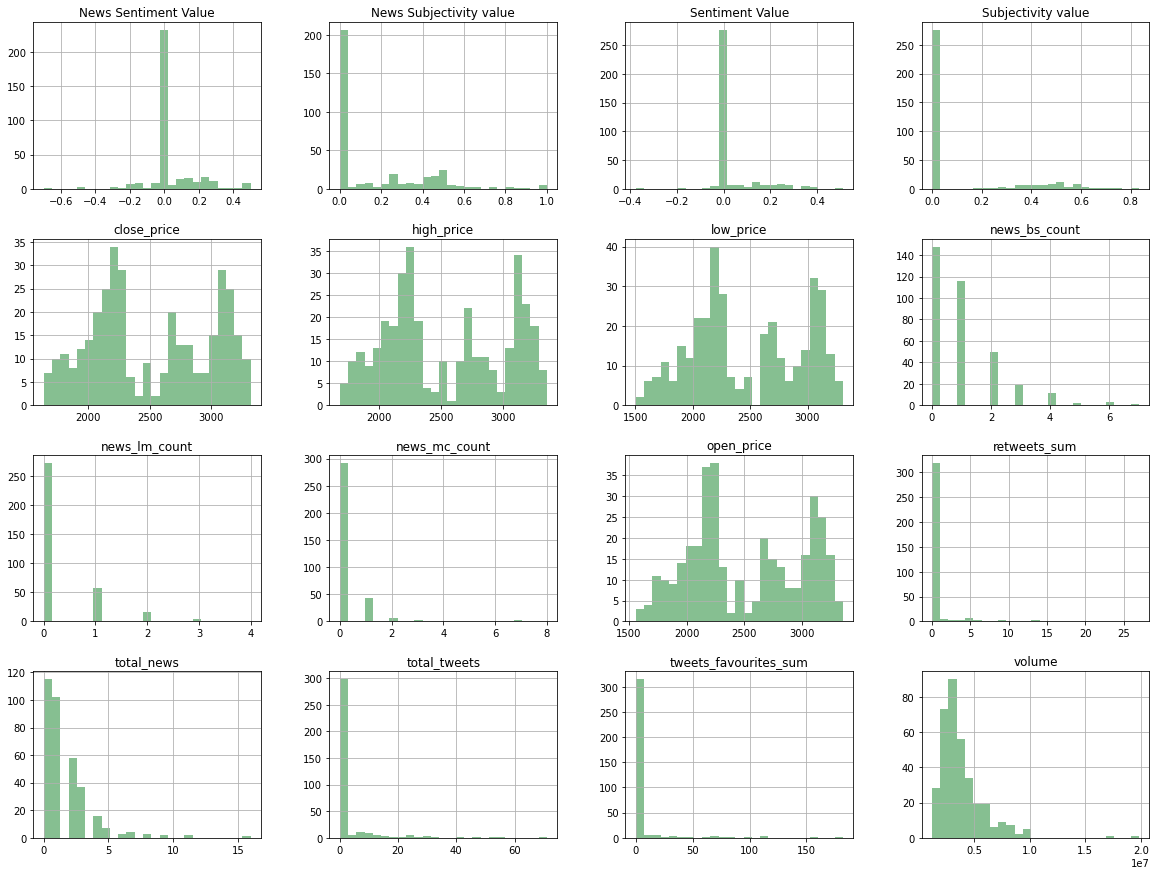

In [170]:
df_dc_consol.hist(bins = 25, figsize = (20,15), color = "#86bf91")
plt.show()

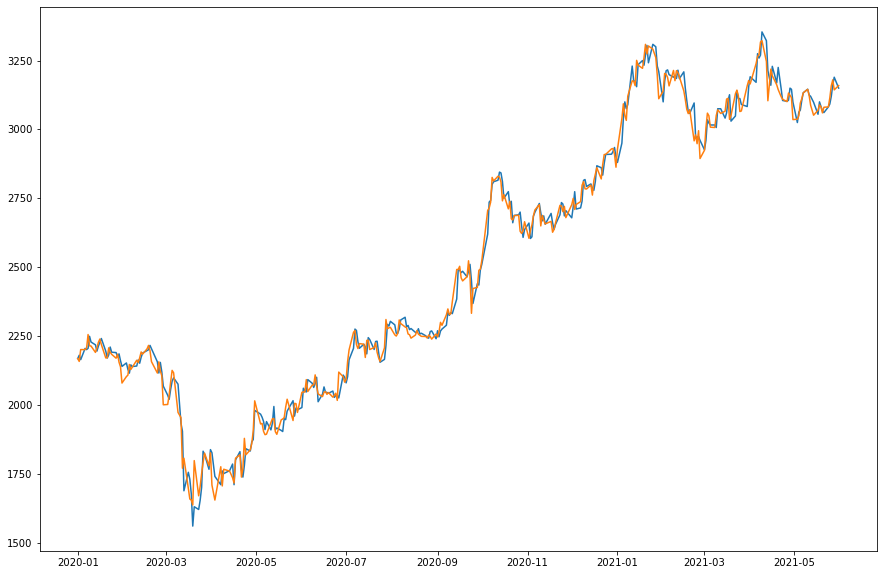

In [172]:
plt.subplots(figsize = (15,10))
plt.plot(df_dc_consol['Date'], df_dc_consol['open_price'])
plt.plot(df_dc_consol['Date'], df_dc_consol['close_price'])

In [173]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.graph_objs import Line

pyo.init_notebook_mode()

fig = go.Figure(data=[go.Candlestick(x=df_dc_consol['Date'],open=df_dc_consol['open_price'], high=df_dc_consol['high_price'],
                low=df_dc_consol['low_price'],
                close=df_dc_consol['close_price'])])

fig.show()

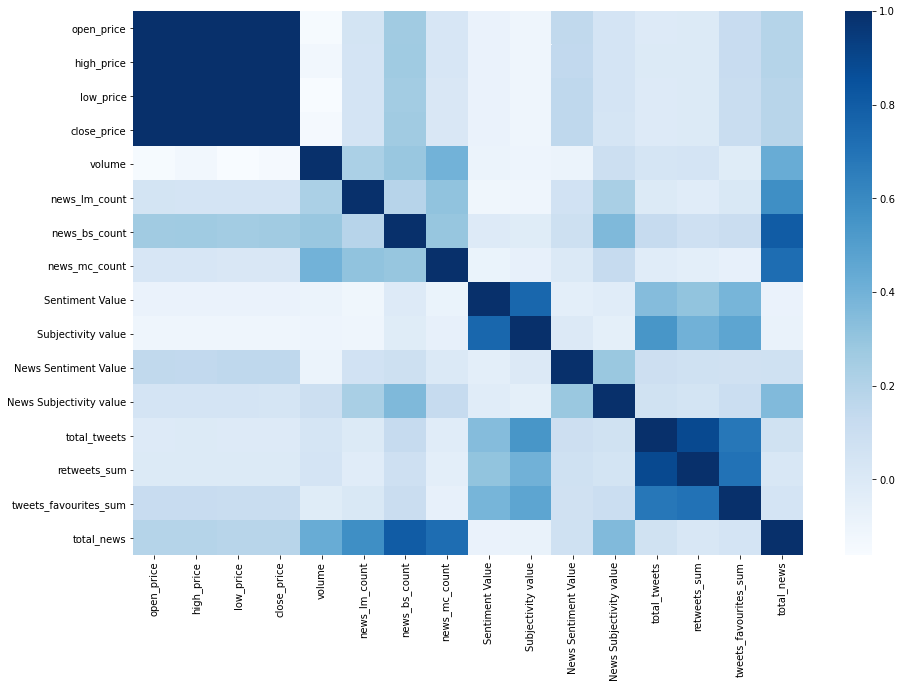

In [175]:
#Checking correlation between variables

df_dc_consol_corr = df_dc_consol.corr()
f,nm = plt.subplots(figsize = (15,10))
sns.heatmap(df_dc_consol_corr,annot = False,cmap='Blues')
plt.show()

In [179]:
#Checking News sentiments

#plt.subplots(figsize = (15,10))

fig = make_subplots(rows=2, cols=1,subplot_titles=('Total News','Trade Volume'))

fig.add_trace(Line(x=df_dc_consol['Date'], y=df_dc_consol['total_news']),row=1, col=1)
fig.add_trace(go.Line(x=df_dc_consol['Date'], y=df_dc_consol['volume']),row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="TCS News & Trade Volume")

fig.show()

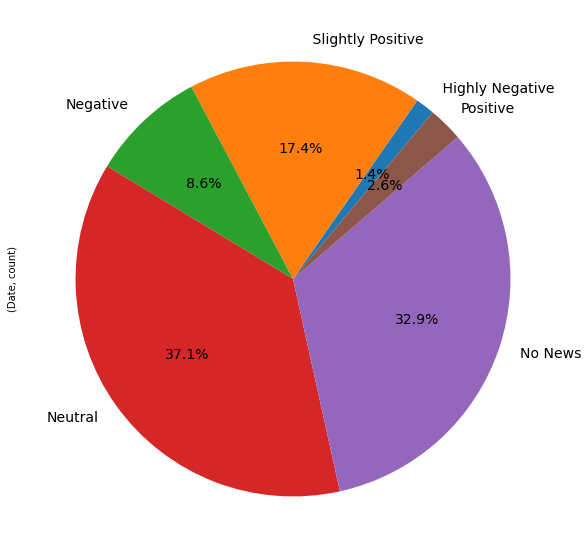

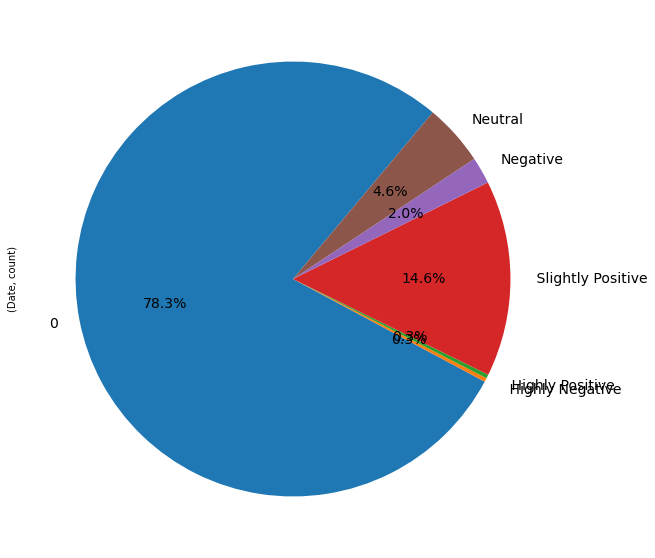

In [180]:
df_dc_consol['News Sentiment on Date'] = df_dc_consol['News Sentiment on Date'].astype(str)
df_dc_consol['News Sentiment on Date'] = df_dc_consol['News Sentiment on Date'].replace('0', 'No News')


df1 = df_dc_consol.groupby(df_dc_consol['News Sentiment on Date']).agg(['count'])
df2 = df_dc_consol.groupby(df_dc_consol['Sentiment on Date']).agg(['count'])

df1_1 = df1.iloc[:, 0:1]
df2_1 = df2.iloc[:, 0:1]


df1_1.plot(kind='pie', y = ('Date', 'count'), autopct='%1.1f%%', startangle=50, shadow=False, legend = False, fontsize=14)
df2_1.plot(kind='pie', y = ('Date', 'count'), autopct='%1.1f%%', startangle=50, shadow=False, legend = False, fontsize=14)

#Subplot for tweets

#subplots=True,

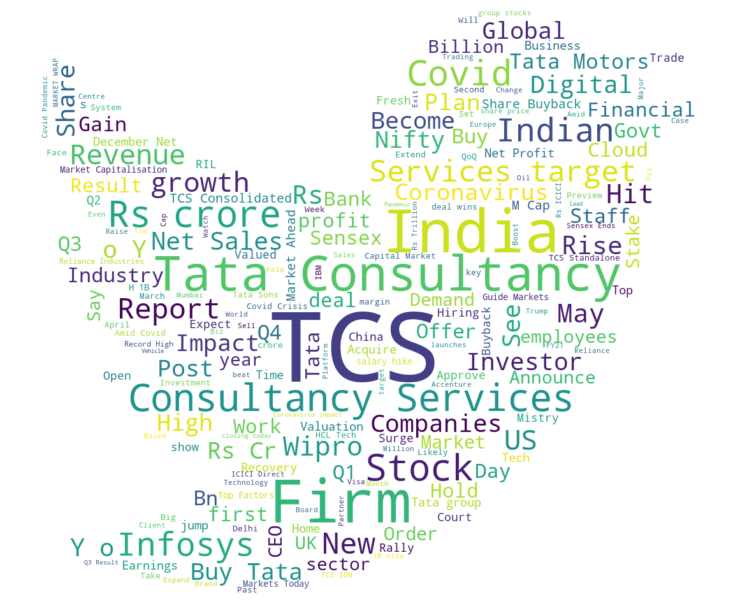

In [181]:
from wordcloud import WordCloud
from PIL import Image

df_dc_consol1 = pd.DataFrame()
df_dc_consol1 = df_dc_consol.loc[df_dc_consol['News'] != '0']
df_dc_consol1['News'] = df_dc_consol1['News'].replace(0, ' ')

text = " ".join(t for t in df_dc_consol1.News)

mask = np.array(Image.open("twitter_logo.png"))

wordcloud = WordCloud(background_color="white",contour_color= 'black', mask = mask)

ab = wordcloud.generate(text)

plt.figure(figsize = (13, 15))
plt.imshow(ab, interpolation='bilinear')
plt.axis("off")
plt.show()

In [182]:
df_dc_consol.head(5)

Date  open_price  high_price  low_price  close_price     volume  \
0 2021-05-31     3150.00     3170.35    3128.60      3159.15  1651930.0   
1 2021-05-28     3189.50     3198.00    3135.65      3143.60  1763701.0   
2 2021-05-27     3161.95     3217.75    3161.80      3180.00  5959785.0   
3 2021-05-26     3120.00     3165.00    3103.80      3158.50  1923753.0   
4 2021-05-25     3092.00     3128.25    3082.10      3114.00  1841613.0   

   news_lm_count  news_bs_count  news_mc_count   Sentiment on Date  ...  \
0            0.0            0.0            0.0                   0  ...   
1            0.0            1.0            0.0   Slightly Positive  ...   
2            1.0            1.0            0.0   Slightly Positive  ...   
3            0.0            0.0            1.0                   0  ...   
4            0.0            6.0            1.0                   0  ...   

  Subjectivity value  News Sentiment on Date  News Subjectivity on Day  \
0           0.000000                 No News                         0   
1           0.517686       Slightly Positive                 Objective   
2           0.600588                 Neutral       Slightly Subjective   
3           0.000000       Slightly Positive       Slightly Subjective   
4           0.000000                Negative       Slightly Subjective   

  News Sentiment Value News Subjectivity value  total_tweets  retweets_sum  \
0             0.000000                0.000000           0.0           0.0   
1             0.300000                0.100000          54.0          27.0   
2             0.050000                0.500000          26.0           3.0   
3             0.136364                0.454545           0.0           0.0   
4            -0.014167                0.473333           0.0           0.0   

   tweets_favourites_sum                                               News  \
0                    0.0                                                  0   
1                  153.0  S D Shibulal Again Buys Infosys Shares Worth R...   
2                   96.0  General Motors' Newest Vehicle: Off-Road, Self...   
3                    0.0  TCS sees pandemic-driven boost in Europe as cl...   
4                    0.0  Dysfunctional Ventilators Serious Matter: Bomb...   

   total_news  
0         0.0  
1         1.0  
2         2.0  
3         1.0  
4         7.0  

[5 rows x 22 columns]

In [183]:
#Dropping unnecessary columns

df_dc_consol1 = df_dc_consol.drop(columns=['high_price', 'low_price', 'news_lm_count', 'news_bs_count', 'news_mc_count', 'Sentiment on Date', 'Subjectivity on Day', 'News Sentiment on Date', 'News Subjectivity on Day', 'News'])
df_dc_consol1 = df_dc_consol1.rename(columns={"Sentiment Value": "Tweets Sentiment Value", "Subjectivity value": "Tweets Subjectivity Value"})
#df_dc_consol1['total_tweets'] = df_dc_consol1['total_news']
df_dc_consol1 = df_dc_consol[]
df_dc_consol1.head(5)

Date  open_price  close_price     volume  Tweets Sentiment Value  \
0 2021-05-31     3150.00      3159.15  1651930.0                0.000000   
1 2021-05-28     3189.50      3143.60  1763701.0                0.145124   
2 2021-05-27     3161.95      3180.00  5959785.0                0.167059   
3 2021-05-26     3120.00      3158.50  1923753.0                0.000000   
4 2021-05-25     3092.00      3114.00  1841613.0                0.000000   

   Tweets Subjectivity Value  News Sentiment Value  News Subjectivity value  \
0                   0.000000              0.000000                 0.000000   
1                   0.517686              0.300000                 0.100000   
2                   0.600588              0.050000                 0.500000   
3                   0.000000              0.136364                 0.454545   
4                   0.000000             -0.014167                 0.473333   

   total_tweets  retweets_sum  tweets_favourites_sum  total_news  
0           0.0           0.0                    0.0         0.0  
1          54.0          27.0                  153.0         1.0  
2          26.0           3.0                   96.0         2.0  
3           0.0           0.0                    0.0         1.0  
4           0.0           0.0                    0.0         7.0

In [185]:
df_dc_consol1['last_day_px'] = df_dc_consol1.sort_values(by=['Date'], ascending=True)['close_price'].shift(1)
df_dc_consol1['stock_movement'] = np.where(df_dc_consol1['close_price'] < df_dc_consol1['last_day_px'], 1, 0)
df_dc_consol1 = df_dc_consol1.loc[df_dc_consol1['last_day_px'] > 0]
df_dc_consol1['price_diff'] = df_dc_consol1['last_day_px'] - df_dc_consol1['close_price']
df_dc_consol1.head(5)

Date  open_price  close_price     volume  Tweets Sentiment Value  \
0 2021-05-31     3150.00      3159.15  1651930.0                0.000000   
1 2021-05-28     3189.50      3143.60  1763701.0                0.145124   
2 2021-05-27     3161.95      3180.00  5959785.0                0.167059   
3 2021-05-26     3120.00      3158.50  1923753.0                0.000000   
4 2021-05-25     3092.00      3114.00  1841613.0                0.000000   

   Tweets Subjectivity Value  News Sentiment Value  News Subjectivity value  \
0                   0.000000              0.000000                 0.000000   
1                   0.517686              0.300000                 0.100000   
2                   0.600588              0.050000                 0.500000   
3                   0.000000              0.136364                 0.454545   
4                   0.000000             -0.014167                 0.473333   

   total_tweets  retweets_sum  tweets_favourites_sum  total_news  last_day_px  \
0           0.0           0.0                    0.0         0.0       3143.6   
1          54.0          27.0                  153.0         1.0       3180.0   
2          26.0           3.0                   96.0         2.0       3158.5   
3           0.0           0.0                    0.0         1.0       3114.0   
4           0.0           0.0                    0.0         7.0       3081.5   

   stock_movement  price_diff  
0               0      -15.55  
1               1       36.40  
2               0      -21.50  
3               0      -44.50  
4               0      -32.50

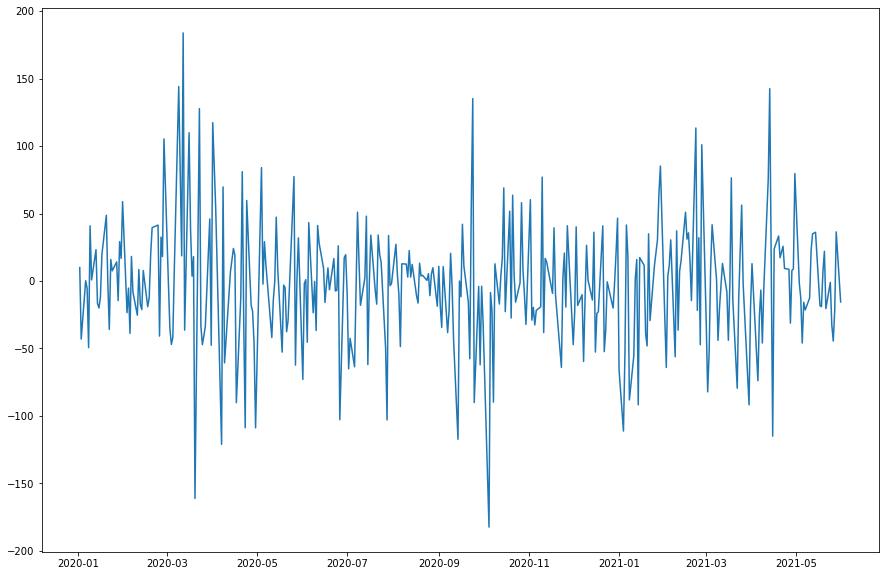

In [178]:
plt.subplots(figsize = (15,10))
plt.plot(df_dc_consol1['Date'], df_dc_consol1['price_diff'])

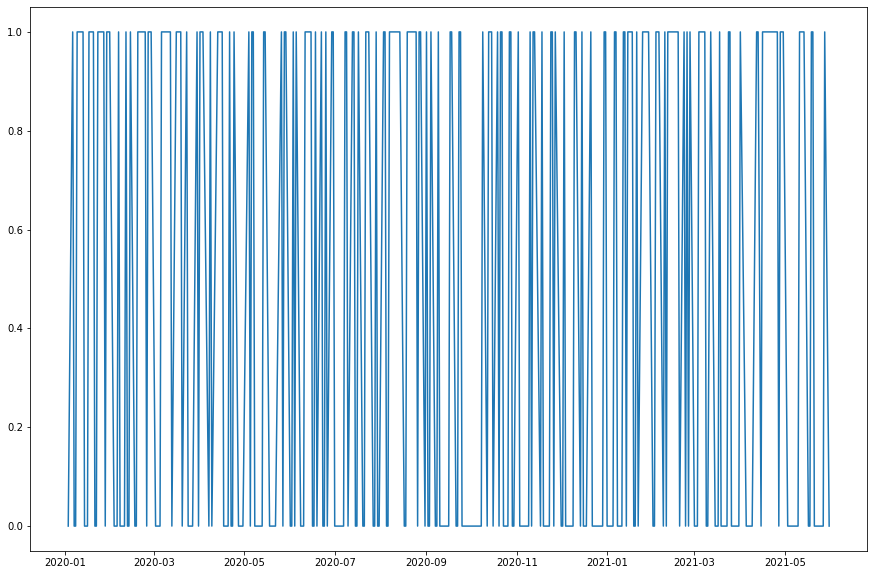

In [235]:
plt.subplots(figsize = (15,10))
plt.plot(df_dc_consol1['Date'], df_dc_consol1['stock_movement'])

In [236]:
corr = df_dc_consol1.corr(method='pearson')
corr

open_price  close_price    volume  \
open_price                   1.000000     0.996635 -0.152909   
close_price                  0.996635     1.000000 -0.143674   
volume                      -0.152909    -0.143674  1.000000   
Tweets Sentiment Value      -0.081339    -0.082017 -0.092183   
Tweets Subjectivity Value   -0.108444    -0.110328 -0.101688   
News Sentiment Value         0.149218     0.153293 -0.091812   
News Subjectivity value      0.043664     0.039370  0.090958   
total_tweets                -0.007848    -0.008731  0.041759   
retweets_sum                -0.005488    -0.004554  0.043849   
tweets_favourites_sum        0.115859     0.113807 -0.024827   
total_news                   0.186991     0.181338  0.427349   
last_day_px                  0.998693     0.995467 -0.158141   
stock_movement               0.018581    -0.032156 -0.106750   
price_diff                   0.002168    -0.067044 -0.148979   
Predicted_Signal             0.463638     0.463291 -0.487877   

                           Tweets Sentiment Value  Tweets Subjectivity Value  \
open_price                              -0.081339                  -0.108444   
close_price                             -0.082017                  -0.110328   
volume                                  -0.092183                  -0.101688   
Tweets Sentiment Value                   1.000000                   0.752055   
Tweets Subjectivity Value                0.752055                   1.000000   
News Sentiment Value                    -0.046081                  -0.001508   
News Subjectivity value                 -0.027355                  -0.052431   
total_tweets                             0.343687                   0.542383   
retweets_sum                             0.308954                   0.404225   
tweets_favourites_sum                    0.387544                   0.466996   
total_news                              -0.082226                  -0.078709   
last_day_px                             -0.077880                  -0.103570   
stock_movement                           0.043933                   0.120945   
price_diff                               0.045004                   0.073047   
Predicted_Signal                         0.069677                   0.074645   

                           News Sentiment Value  News Subjectivity value  \
open_price                             0.149218                 0.043664   
close_price                            0.153293                 0.039370   
volume                                -0.091812                 0.090958   
Tweets Sentiment Value                -0.046081                -0.027355   
Tweets Subjectivity Value             -0.001508                -0.052431   
News Sentiment Value                   1.000000                 0.285360   
News Subjectivity value                0.285360                 1.000000   
total_tweets                           0.089526                 0.069123   
retweets_sum                           0.079453                 0.048029   
tweets_favourites_sum                  0.072827                 0.100113   
total_news                             0.076085                 0.356121   
last_day_px                            0.145445                 0.042852   
stock_movement                        -0.069557                 0.016932   
price_diff                            -0.085316                 0.035762   
Predicted_Signal                       0.156838                 0.031413   

                           total_tweets  retweets_sum  tweets_favourites_sum  \
open_price                    -0.007848     -0.005488               0.115859   
close_price                   -0.008731     -0.004554               0.113807   
volume                         0.041759      0.043849              -0.024827   
Tweets Sentiment Value         0.343687      0.308954               0.387544   
Tweets Subjectivity Value      0.542383      0.404225               0.466996   
News Sentiment Value    

In [237]:
y = df_dc_consol1['stock_movement']
x = df_dc_consol1[['last_day_px', 'volume', 'Tweets Sentiment Value', 'Tweets Subjectivity Value', 'News Sentiment Value', 'News Subjectivity value', 'total_news', 'total_tweets']]

split = int(0.7*len(df_dc_consol))
x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model = model.fit(x_train,y_train)

In [239]:
#Coefficients 

pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))

0                          1
0                last_day_px   [0.00021437224696221552]
1                     volume  [-2.0445629021197434e-07]
2     Tweets Sentiment Value    [4.871081696481476e-09]
3  Tweets Subjectivity Value    [3.213337374766781e-08]
4       News Sentiment Value    [4.671426465553591e-09]
5    News Subjectivity value   [2.3177546920189017e-08]
6                 total_news    [8.493919963639128e-08]
7               total_tweets     [8.24316921232152e-07]

In [240]:
probability = model.predict_proba(x_test)
#print(probability)

predicted = model.predict(x_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [241]:
print(metrics.confusion_matrix(y_test, predicted))

[[48  7]
 [41  8]]


In [242]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67        55
           1       0.53      0.16      0.25        49

    accuracy                           0.54       104
   macro avg       0.54      0.52      0.46       104
weighted avg       0.54      0.54      0.47       104



In [252]:
df_dc_consol1.groupby(df_dc_consol1['stock_movement']).agg(['count']).reset_index()

stock_movement  Date open_price close_price volume Tweets Sentiment Value  \
                 count      count       count  count                  count   
0              0   187        187         187    187                    187   
1              1   161        161         161    161                    161   

  Tweets Subjectivity Value News Sentiment Value News Subjectivity value  \
                      count                count                   count   
0                       187                  187                     187   
1                       161                  161                     161   

  total_tweets retweets_sum tweets_favourites_sum total_news last_day_px  \
         count        count                 count      count       count   
0          187          187                   187        187         187   
1          161          161                   161        161         161   

  price_diff Predicted_Signal  
       count            count  
0        187              187  
1        161              161

In [243]:
#Model Accuracy

print(model.score(x_test,y_test))

0.5384615384615384


In [201]:
df_dc_consol2 = df_dc_consol1

df_dc_consol2['Predicted_Signal'] = model.predict(x)
df_dc_consol2.head()

Date  open_price  close_price     volume  Tweets Sentiment Value  \
0 2021-05-31     3150.00      3159.15  1651930.0                0.000000   
1 2021-05-28     3189.50      3143.60  1763701.0                0.145124   
2 2021-05-27     3161.95      3180.00  5959785.0                0.167059   
3 2021-05-26     3120.00      3158.50  1923753.0                0.000000   
4 2021-05-25     3092.00      3114.00  1841613.0                0.000000   

   Tweets Subjectivity Value  News Sentiment Value  News Subjectivity value  \
0                   0.000000              0.000000                 0.000000   
1                   0.517686              0.300000                 0.100000   
2                   0.600588              0.050000                 0.500000   
3                   0.000000              0.136364                 0.454545   
4                   0.000000             -0.014167                 0.473333   

   total_tweets  retweets_sum  tweets_favourites_sum  total_news  last_day_px  \
0           0.0           0.0                    0.0         0.0       3143.6   
1          54.0          27.0                  153.0         1.0       3180.0   
2          26.0           3.0                   96.0         2.0       3158.5   
3           0.0           0.0                    0.0         1.0       3114.0   
4           0.0           0.0                    0.0         7.0       3081.5   

   stock_movement  price_diff  Predicted_Signal  
0               0      -15.55                 1  
1               1       36.40                 1  
2               0      -21.50                 0  
3               0      -44.50                 1  
4               0      -32.50                 1

In [92]:
############# Linear Regression ################

In [215]:
y = df_dc_consol1['close_price']
x = df_dc_consol1[['last_day_px', 'volume', 'Tweets Sentiment Value', 'Tweets Subjectivity Value', 'News Sentiment Value', 'News Subjectivity value', 'total_news', 'tweets_favourites_sum']]

split = int(0.7*len(df_dc_consol1))
x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

model = LinearRegression()

model.fit(X = x_train, y = y_train)

LinearRegression()

In [222]:
#make predictions and find the rmse
y_pred = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rms

54.563561914274224

In [229]:
y_pred = model.predict(x_test)
y_pred

array([2079.62610185, 2055.48600111, 2101.99451351, 2059.37664353,
       2057.46346755, 2039.05241046, 1983.21523417, 2018.65558793,
       2000.98642714, 1948.64907544, 2037.56142578, 2003.52234146,
       1963.63136495, 1953.29420525, 1955.54938741, 1905.95420324,
       1912.32910137, 1940.55511015, 1956.46143162, 1943.61419824,
       1899.44352639, 1898.99846732, 1911.54376431, 1944.49718225,
       1938.84990186, 2027.04423573, 1922.79180318, 1864.32309857,
       1803.47734369, 1814.60685282, 1867.67740704, 1794.13724277,
       1751.03754865, 1827.874583  , 1801.56166709, 1757.99991572,
       1749.26180436, 1777.49332525, 1751.87205026, 1727.89186813,
       1802.73802981, 1677.49879388, 1731.53395297, 1829.06664031,
       1795.93413751, 1853.62464556, 1792.75344394, 1764.02884175,
       1688.95118349, 1673.56298185, 1815.7974333 , 1661.86311828,
       1660.83892565, 1676.43423847, 1721.10279543, 1824.03510398,
       1805.97845587, 1985.74938921, 1962.35983637, 2135.29614

In [232]:
y_test

244    2072.05
245    2071.75
246    2048.25
247    2091.55
248    2046.15
        ...   
344    2214.35
345    2255.25
346    2205.85
347    2200.45
348    2200.65
Name: close_price, Length: 105, dtype: float64

In [230]:
#Model Accuracy

print(model.score(x_test,y_test))

0.9050416706818057


In [234]:
from statsmodels.formula.api import ols

model = ols('y_train~x_train', data=df_dc_consol1)
fitted_model = model.fit()
fitted_model.summary()

PatsyError: Number of rows mismatch between data argument and y_train (348 versus 243)
    y_train~x_train
    ^^^^^^^